# PART 2: Data Visualization and Analysis

In [1]:
#!python -m pip install -U pip
#!python -m pip install -U matplotlib
#!python -m pip install -U sklearn

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

## Working with UFC&Event Data

In [3]:
# Import data
ufc_event_data = pd.read_csv("data_files/ufc&event_info.csv")
ufc_event_data

,Unnamed: 0,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Significant Strikes Landed/min,Blue Significant Striking Accuracy,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy
0,0,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,5.03,0.52,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46
1,1,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,4.35,0.32,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51
2,2,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,2.77,0.66,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66
3,3,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,4.15,0.49,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53
4,4,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,2.29,0.40,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,363,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Giga Chikadze,Jamey Simmons,-835.0,525.0,...,0.00,0.00,0.0,0.00,0.00,3.52,0.43,0.0,0.40,0.40
364,364,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Alexandr Romanov,Marcos Rogerio de Lima,-455.0,330.0,...,3.78,0.54,0.8,0.76,0.60,5.87,0.37,3.2,6.41,1.00
365,365,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Darren Elkins,Eduardo Garagorri,-240.0,185.0,...,3.75,0.54,0.0,0.79,1.00,3.54,0.37,1.2,2.43,0.33
366,366,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Max Griffin,Ramiz Brahimaj,-143.0,115.0,...,0.00,0.00,0.0,0.00,0.00,3.87,0.49,0.5,1.90,0.55


In [4]:
# 2020/7/11, event id 121, first match day with COVID
# Remove unnecessary column
del ufc_event_data["Unnamed: 0"]

In [5]:
# Create a new column to hold pre/during COVID label
# Create a new column to hold Red Odds
# Create a new column to hold Blue Odds
ufc_event_data["Pre/During COVID"] = ""
ufc_event_data["Red Odds"] = ""
ufc_event_data["Blue Odds"] = ""
# Move it to the front
column_name = "Pre/During COVID"
first_column = ufc_event_data.pop(column_name)
ufc_event_data.insert(0,column_name,first_column)
ufc_event_data.head()

,Pre/During COVID,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy,Red Odds,Blue Odds
0,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46,,
1,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51,,
2,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66,,
3,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53,,
4,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25,,


In [6]:
# Display the list of dates
ufc_event_data["Date"].unique()

array(['2020-02-08', '2020-02-15', '2020-02-22', '2020-02-29',
       '2020-03-07', '2020-03-14', '2020-05-09', '2020-05-13',
       '2020-05-16', '2020-05-30', '2020-06-06', '2020-06-13',
       '2020-06-20', '2020-06-27', '2020-07-11', '2020-07-15',
       '2020-07-18', '2020-07-25', '2020-08-01', '2020-08-08',
       '2020-08-15', '2020-08-22', '2020-08-29', '2020-09-05',
       '2020-09-12', '2020-09-19', '2020-09-26', '2020-10-03',
       '2020-10-10', '2020-10-17', '2020-10-24', '2020-10-31',
       '2020-11-07'], dtype=object)

In [7]:
# Identify the location of 2020-07-11
rowindex = ufc_event_data.index[ufc_event_data["Date"]=='2020-07-11']
rowindex

Int64Index([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172], dtype='int64')

In [8]:
# Label the date before 2020-07-11 with "Pre_COVID" in Pre/During COVID column
# Label the date from 2020-07-11 on with "During_COVID" in Pre/During COVID column
rowrange = list(range(159))
rowduring = list(range(160,368))
ufc_event_data.loc[rowrange, "Pre/During COVID"] = "Pre_COVID"
ufc_event_data.loc[rowduring, "Pre/During COVID"] = "During_COVID"
ufc_event_data

,Pre/During COVID,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy,Red Odds,Blue Odds
0,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46,,
1,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51,,
2,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66,,
3,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53,,
4,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Giga Chikadze,Jamey Simmons,-835.0,525.0,...,0.0,0.00,0.00,3.52,0.43,0.0,0.40,0.40,,
364,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Alexandr Romanov,Marcos Rogerio de Lima,-455.0,330.0,...,0.8,0.76,0.60,5.87,0.37,3.2,6.41,1.00,,
365,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Darren Elkins,Eduardo Garagorri,-240.0,185.0,...,0.0,0.79,1.00,3.54,0.37,1.2,2.43,0.33,,
366,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Max Griffin,Ramiz Brahimaj,-143.0,115.0,...,0.0,0.00,0.00,3.87,0.49,0.5,1.90,0.55,,


In [9]:
# Add boolean values to the red odds and blue odds columns
bet_correct_index = ufc_event_data.index[ufc_event_data["American Odd that Red Fighter Will Win"] < 0]
bet_wrong_index = ufc_event_data.index[ufc_event_data["American Odd that Red Fighter Will Win"] > 0]
ufc_event_data.loc[bet_correct_index, "Red Odds"] = "For"
ufc_event_data.loc[bet_wrong_index, "Red Odds"] = "Not For"

bbet_correct_index = ufc_event_data.index[ufc_event_data["American Odd that Blue Fighter Will Win"] < 0]
bbet_wrong_index = ufc_event_data.index[ufc_event_data["American Odd that Blue Fighter Will Win"] > 0]
ufc_event_data.loc[bbet_correct_index, "Blue Odds"] = "For"
ufc_event_data.loc[bbet_wrong_index, "Blue Odds"] = "Not For"

ufc_event_data

,Pre/During COVID,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy,Red Odds,Blue Odds
0,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46,For,Not For
1,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51,For,Not For
2,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66,For,Not For
3,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53,For,Not For
4,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25,For,Not For
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Giga Chikadze,Jamey Simmons,-835.0,525.0,...,0.0,0.00,0.00,3.52,0.43,0.0,0.40,0.40,For,Not For
364,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Alexandr Romanov,Marcos Rogerio de Lima,-455.0,330.0,...,0.8,0.76,0.60,5.87,0.37,3.2,6.41,1.00,For,Not For
365,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Darren Elkins,Eduardo Garagorri,-240.0,185.0,...,0.0,0.79,1.00,3.54,0.37,1.2,2.43,0.33,For,Not For
366,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Max Griffin,Ramiz Brahimaj,-143.0,115.0,...,0.0,0.00,0.00,3.87,0.49,0.5,1.90,0.55,For,Not For


###### Pre-COVID on Betting Odds

In [10]:
# Get the pre_covid data
pre_covid_event = ufc_event_data.loc[ufc_event_data["Pre/During COVID"]=="Pre_COVID"]
pre_covid_event

,Pre/During COVID,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy,Red Odds,Blue Odds
0,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46,For,Not For
1,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51,For,Not For
2,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66,For,Not For
3,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53,For,Not For
4,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25,For,Not For
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Pre_COVID,131,2020-06-27,UFC Fight Night,UFC Fight Night: Poirier vs. Hooker,2020-06-27T18:00:00,Mara Romero Borella,Miranda Maverick,230.0,-305.0,...,0.0,0.00,0.00,2.54,0.37,0.2,1.66,0.43,Not For,For
155,Pre_COVID,131,2020-06-27,UFC Fight Night,UFC Fight Night: Poirier vs. Hooker,2020-06-27T18:00:00,Philipe Lins,Tanner Boser,-112.0,-112.0,...,0.0,0.00,0.00,2.73,0.41,0.0,0.00,0.00,For,For
156,Pre_COVID,131,2020-06-27,UFC Fight Night,UFC Fight Night: Poirier vs. Hooker,2020-06-27T18:00:00,Sean Woodson,Julian Erosa,-455.0,325.0,...,0.8,0.83,0.60,5.27,0.43,0.0,0.00,0.00,For,Not For
157,Pre_COVID,131,2020-06-27,UFC Fight Night,UFC Fight Night: Poirier vs. Hooker,2020-06-27T18:00:00,Takashi Sato,Jason Witt,-278.0,215.0,...,0.0,0.00,0.00,3.13,0.36,0.0,0.82,0.50,For,Not For


In [11]:
# If the winner of the fight is red and the red odd is for
right_bet = pre_covid_event.loc[(pre_covid_event["Winner of the Fight"] == "Red") &
                                (pre_covid_event["Red Odds"] == "For")]
len(right_bet)

74

In [12]:
# If the winner of the fight is red and the red odd is not for
wrong_bet = pre_covid_event.loc[(pre_covid_event["Winner of the Fight"] == "Red") &
                                (pre_covid_event["Red Odds"] == "Not For")]
len(wrong_bet)

27

In [13]:
# If the winner of the fight is blue and the blue odd is for
b_right_bet = pre_covid_event.loc[(pre_covid_event["Winner of the Fight"] == "Blue") &
                                (pre_covid_event["Blue Odds"] == "For")]
len(b_right_bet)

28

In [14]:
# If the winner of the fight is blue and the blue odd is not for
b_wrong_bet = pre_covid_event.loc[(pre_covid_event["Winner of the Fight"] == "Blue") &
                                (pre_covid_event["Blue Odds"] == "Not For")]
len(b_wrong_bet)

30

In [15]:
# Total of right bets
right_bets = len(right_bet)+len(b_right_bet)
right_bets

102

In [16]:
# Total of wrong bets
wrong_bets = len(wrong_bet)+ len(b_wrong_bet)
wrong_bets

57

In [17]:
# Percentage of right bets
total_right = right_bets+wrong_bets
right_bets_percentage = right_bets/total_right
right_bets_percentage

0.6415094339622641

In [18]:
# Percentage of wrong bets
wrong_bets_percentage = wrong_bets/total_right
wrong_bets_percentage

0.3584905660377358

###### During-COVID on Betting Odds

In [19]:
# Get the during_covid data
during_covid_event = ufc_event_data.loc[ufc_event_data["Pre/During COVID"]=="During_COVID"]

In [20]:
# If the winner of the fight is red and the red odd is for
du_right_bet = during_covid_event.loc[(during_covid_event["Winner of the Fight"] == "Red") &
                                (during_covid_event["Red Odds"] == "For")]
len(du_right_bet)

103

In [21]:
# If the winner of the fight is red and the red odd is not for
du_wrong_bet = during_covid_event.loc[(during_covid_event["Winner of the Fight"] == "Red") &
                                (during_covid_event["Red Odds"] == "Not For")]
len(du_wrong_bet)

23

In [22]:
# If the winner of the fight is blue and the blue odd is for
b_du_right_bet = during_covid_event.loc[(during_covid_event["Winner of the Fight"] == "Blue") &
                                (during_covid_event["Blue Odds"] == "For")]
len(b_du_right_bet)

47

In [23]:
# If the winner of the fight is blue and the blue odd is not for
b_du_wrong_bet = during_covid_event.loc[(during_covid_event["Winner of the Fight"] == "Blue") &
                                (during_covid_event["Blue Odds"] == "Not For")]
len(b_du_wrong_bet)

35

In [24]:
# Total of right bets
total_du_right_bets = len(du_right_bet)+len(b_du_right_bet)
total_du_right_bets

150

In [25]:
# Total of wrong bets
total_du_wrong_bets = len(du_wrong_bet)+ len(b_du_wrong_bet)
total_du_wrong_bets

58

In [26]:
# Percentage of right bets
du_total_right = total_du_right_bets + total_du_wrong_bets
du_right_bets_percentage = total_du_right_bets/du_total_right
du_right_bets_percentage

0.7211538461538461

In [27]:
# Percentage of right bets
du_wrong_bets_percentage = total_du_wrong_bets/du_total_right
du_wrong_bets_percentage

0.27884615384615385

#### Combined Stats DataFrame

In [28]:
# Create a dataframe for these values
time_column = ["Pre_COVID", "During_COVID"]
rights_list = [right_bets, total_du_right_bets]
wrong_list = [wrong_bets, total_du_wrong_bets]
betting_data = pd.DataFrame({"Time":time_column,
                            "Right Betting":rights_list,
                            "Wrong Betting":wrong_list})
betting_data.T

,0,1
Time,Pre_COVID,During_COVID
Right Betting,102,150
Wrong Betting,57,58


In [29]:
pre_percentage_bets = [right_bets_percentage,wrong_bets_percentage]

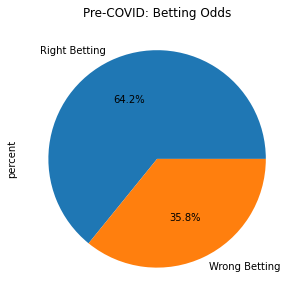

In [30]:
#Pre-Covid right vs wrong betting
# df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
#                   index=['Mercury', 'Venus', 'Earth'])
# plot = df.plot.pie(y='mass', figsize=(5, 5))

df = pd.DataFrame({'percent': pre_percentage_bets}, index=['Right Betting', "Wrong Betting"])
plot = df.plot.pie(y='percent', figsize=(5, 5), autopct="%1.1f%%", legend=None)
plt.title("Pre-COVID: Betting Odds")
output_file = "Images/Pre_Covid_betting_pie.png"
plt.savefig(output_file)
plt.show()

In [31]:
dur_covid_bets = [du_right_bets_percentage, du_wrong_bets_percentage]

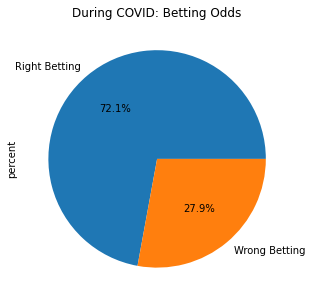

In [32]:
#During Covid right vs wrong betting
#Pre-Covid right vs wrong betting
# df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
#                   index=['Mercury', 'Venus', 'Earth'])
# plot = df.plot.pie(y='mass', figsize=(5, 5))

df = pd.DataFrame({'percent':dur_covid_bets }, index=['Right Betting', "Wrong Betting"])
plot = df.plot.pie(y='percent', figsize=(5, 5), autopct="%1.1f%%", legend=None)
plt.title("During COVID: Betting Odds")
output_file = "Images/During_Covid__betting_pie.png"
plt.savefig(output_file)
plt.show()


###### Pre-COVID On Fight Info

In [33]:
# Get a list of the columns
pre_covid_event.columns

Index(['Pre/During COVID', 'Event ID', 'Date', 'Short Name', 'Name',
       'Date Time', 'Red Fighter Name', 'Blue Fighter Name',
       'American Odd that Red Fighter Will Win',
       'American Odd that Blue Fighter Will Win', 'Location', 'Country',
       'Winner of the Fight', 'Title Bout?', 'Weight Class',
       'Number of Rounds in Fight', 'Blue Significant Strikes Landed/min',
       'Blue Significant Striking Accuracy',
       'Blue Average Submissions Attempted/15min',
       'Blue Average Takedowns Landed/15min', 'Blue Takedown Accuracy',
       'Red Significant Strikes Landed/min',
       'Red Significant Striking Accuracy',
       'Red Average Submissions Attempted/15min',
       'Red Average Takedowns Landed/15min', 'Red Takedown Accuracy',
       'Red Odds', 'Blue Odds'],
      dtype='object')

In [34]:
# Extract only the columns on fight info
fight_info_pre = pre_covid_event[['Blue Significant Strikes Landed/min',
                                 'Red Significant Strikes Landed/min',
                                 'Blue Significant Striking Accuracy',
                                 'Red Significant Striking Accuracy',
                                 'Blue Average Submissions Attempted/15min',
                                 'Red Average Submissions Attempted/15min',
                                 'Blue Average Takedowns Landed/15min',
                                 'Red Average Takedowns Landed/15min',
                                 'Blue Takedown Accuracy',
                                 'Red Takedown Accuracy']]
fight_info_pre.mean()

Blue Significant Strikes Landed/min         3.661069
Red Significant Strikes Landed/min          3.942013
Blue Significant Striking Accuracy          0.408428
Red Significant Striking Accuracy           0.447799
Blue Average Submissions Attempted/15min    0.564151
Red Average Submissions Attempted/15min     0.679874
Blue Average Takedowns Landed/15min         1.153899
Red Average Takedowns Landed/15min          1.501698
Blue Takedown Accuracy                      0.322956
Red Takedown Accuracy                       0.366730
dtype: float64

In [35]:
# Get the weighted average for strikes for blue and red fighters
strike_mean_b = fight_info_pre['Blue Significant Strikes Landed/min'].mean()
strike_count_b = fight_info_pre['Blue Significant Strikes Landed/min'].count()
strike_mean_r = fight_info_pre['Red Significant Strikes Landed/min'].mean()
strike_count_r = fight_info_pre['Red Significant Strikes Landed/min'].count()
strikes = ((strike_mean_b * strike_count_b) + (strike_mean_r * strike_count_r))/(strike_count_b + strike_count_r)
strikes

3.8015408805031443

In [36]:
# Get the weighted average for strikes accuracy for blue and red fighters
strike_accuracy_mean_b = fight_info_pre['Blue Significant Striking Accuracy'].mean()
strike_accuracy_count_b = fight_info_pre['Blue Significant Striking Accuracy'].count()
strike_accuracy_mean_r = fight_info_pre['Red Significant Striking Accuracy'].mean()
strike_accurary_count_r = fight_info_pre['Red Significant Striking Accuracy'].count()
strikes_accuracy = ((strike_accuracy_mean_b * strike_accuracy_count_b) + (strike_accuracy_mean_r * strike_accurary_count_r))/(strike_accuracy_count_b + strike_accurary_count_r)
strikes_accuracy

0.42811320754716975

In [37]:
# Get the weighted average for submission for blue and red fighters
submission_mean_b = fight_info_pre['Blue Average Submissions Attempted/15min'].mean()
submission_count_b = fight_info_pre['Blue Average Submissions Attempted/15min'].count()
submission_mean_r = fight_info_pre['Red Average Submissions Attempted/15min'].mean()
submission_count_r = fight_info_pre['Red Average Submissions Attempted/15min'].count()
submissions = ((submission_mean_b * submission_count_b) + (submission_mean_r * submission_count_r))/(submission_count_b + submission_count_r)
submissions

0.6220125786163522

In [38]:
# Get the weighted average for takedown for blue and red fighters
takedown_mean_b = fight_info_pre['Blue Average Takedowns Landed/15min'].mean()
takedown_count_b = fight_info_pre['Blue Average Takedowns Landed/15min'].count()
takedown_mean_r = fight_info_pre['Red Average Takedowns Landed/15min'].mean()
takedown_count_r = fight_info_pre['Red Average Takedowns Landed/15min'].count()
takedowns = ((takedown_mean_b * takedown_count_b) + (takedown_mean_r * takedown_count_r))/(takedown_count_b + takedown_count_r)
takedowns

1.3277987421383646

In [39]:
# Get the weighted average for takedown accuracy for blue and red fighters
takedown_a_mean_b = fight_info_pre['Blue Takedown Accuracy'].mean()
takedown_a_count_b = fight_info_pre['Blue Takedown Accuracy'].count()
takedown_a_mean_r = fight_info_pre['Red Takedown Accuracy'].mean()
takedown_a_count_r = fight_info_pre['Red Takedown Accuracy'].count()
takedowns_accuracy = ((takedown_a_mean_b * takedown_a_count_b) + (takedown_a_mean_r * takedown_a_count_r))/(takedown_a_count_b + takedown_a_count_r)
takedowns_accuracy

0.3448427672955975

###### During-COVID On Fight Info

In [40]:
# Extract only the columns on fight info
fight_info_dur = during_covid_event[['Blue Significant Strikes Landed/min',
                                 'Red Significant Strikes Landed/min',
                                 'Blue Significant Striking Accuracy',
                                 'Red Significant Striking Accuracy',
                                 'Blue Average Submissions Attempted/15min',
                                 'Red Average Submissions Attempted/15min',
                                 'Blue Average Takedowns Landed/15min',
                                 'Red Average Takedowns Landed/15min',
                                 'Blue Takedown Accuracy',
                                 'Red Takedown Accuracy']]
fight_info_dur.mean()

Blue Significant Strikes Landed/min         3.225625
Red Significant Strikes Landed/min          3.944375
Blue Significant Striking Accuracy          0.366106
Red Significant Striking Accuracy           0.438462
Blue Average Submissions Attempted/15min    0.391827
Red Average Submissions Attempted/15min     0.659615
Blue Average Takedowns Landed/15min         1.163654
Red Average Takedowns Landed/15min          1.516490
Blue Takedown Accuracy                      0.294038
Red Takedown Accuracy                       0.372596
dtype: float64

In [41]:
# Get the weighted average for strikes for blue and red fighters
covid_strike_mean_b = fight_info_dur['Blue Significant Strikes Landed/min'].mean()
covid_strike_count_b = fight_info_dur['Blue Significant Strikes Landed/min'].count()
covid_strike_mean_r = fight_info_dur['Red Significant Strikes Landed/min'].mean()
covid_strike_count_r = fight_info_dur['Red Significant Strikes Landed/min'].count()
covid_strikes = ((covid_strike_mean_b * covid_strike_count_b) + (covid_strike_mean_r * covid_strike_count_r))/(covid_strike_count_b + covid_strike_count_r)
covid_strikes

3.5850000000000004

In [42]:
# Get the weighted average for strikes accuracy for blue and red fighters
covid_strike_accuracy_mean_b = fight_info_dur['Blue Significant Striking Accuracy'].mean()
covid_strike_accuracy_count_b = fight_info_dur['Blue Significant Striking Accuracy'].count()
covid_strike_accuracy_mean_r = fight_info_dur['Red Significant Striking Accuracy'].mean()
covid_strike_accurary_count_r = fight_info_dur['Red Significant Striking Accuracy'].count()
covid_strikes_accuracy = ((covid_strike_accuracy_mean_b * covid_strike_accuracy_count_b) + (covid_strike_accuracy_mean_r * covid_strike_accurary_count_r))/(covid_strike_accuracy_count_b + covid_strike_accurary_count_r)
covid_strikes_accuracy

0.4022836538461539

In [43]:
# Get the weighted average for submission for blue and red fighters
covid_submission_mean_b = fight_info_dur['Blue Average Submissions Attempted/15min'].mean()
covid_submission_count_b = fight_info_dur['Blue Average Submissions Attempted/15min'].count()
covid_submission_mean_r = fight_info_dur['Red Average Submissions Attempted/15min'].mean()
covid_submission_count_r = fight_info_dur['Red Average Submissions Attempted/15min'].count()
covid_submissions = ((covid_submission_mean_b * covid_submission_count_b) + (covid_submission_mean_r * covid_submission_count_r))/(covid_submission_count_b + covid_submission_count_r)
covid_submissions

0.5257211538461538

In [44]:
# Get the weighted average for takedown for blue and red fighters
covid_takedown_mean_b = fight_info_dur['Blue Average Takedowns Landed/15min'].mean()
covid_takedown_count_b = fight_info_dur['Blue Average Takedowns Landed/15min'].count()
covid_takedown_mean_r = fight_info_dur['Red Average Takedowns Landed/15min'].mean()
covid_takedown_count_r = fight_info_dur['Red Average Takedowns Landed/15min'].count()
covid_takedowns = ((covid_takedown_mean_b * covid_takedown_count_b) + (covid_takedown_mean_r * covid_takedown_count_r))/(covid_takedown_count_b + covid_takedown_count_r)
covid_takedowns

1.3400721153846153

In [45]:
# Get the weighted average for takedown accuracy for blue and red fighters
covid_takedown_a_mean_b = fight_info_dur['Blue Takedown Accuracy'].mean()
covid_takedown_a_count_b = fight_info_dur['Blue Takedown Accuracy'].count()
covid_takedown_a_mean_r = fight_info_dur['Red Takedown Accuracy'].mean()
covid_takedown_a_count_r = fight_info_dur['Red Takedown Accuracy'].count()
covid_takedowns_accuracy = ((covid_takedown_a_mean_b * covid_takedown_a_count_b) + (covid_takedown_a_mean_r * covid_takedown_a_count_r))/(covid_takedown_a_count_b + covid_takedown_a_count_r)
covid_takedowns_accuracy

0.33331730769230766

#### Combined Stats DataFrame

In [46]:
# Create a dataframe for these values
time_column = ["Pre_COVID", "During_COVID"]
strike_list = [strikes,covid_strikes]
strike_accuracy_list = [strikes_accuracy,covid_strikes_accuracy]
submission_list = [submissions,covid_submissions]
takedown_list = [takedowns,covid_takedowns]
takendown_accuracy = [takedowns_accuracy,covid_takedowns_accuracy]
fight_info_data = pd.DataFrame({"Time":time_column,
                            "Significant Strikes Landed/min":strike_list,
                            "Significant Striking Accuracy":strike_accuracy_list,
                            "Average Submissions Attempted/15min":submission_list,
                            "Average Takedowns":takedown_list,
                            "Average Takedowns Landed/15min":takendown_accuracy})
fight_info_data

,Time,Significant Strikes Landed/min,Significant Striking Accuracy,Average Submissions Attempted/15min,Average Takedowns,Average Takedowns Landed/15min
0,Pre_COVID,3.801541,0.428113,0.622013,1.327799,0.344843
1,During_COVID,3.585000,0.402284,0.525721,1.340072,0.333317


In [47]:
# Extract the pre_covid row of data
pre_covid_data_graph = fight_info_data.loc[fight_info_data["Time"]=="Pre_COVID"]
pre_covid_data_graph

,Time,Significant Strikes Landed/min,Significant Striking Accuracy,Average Submissions Attempted/15min,Average Takedowns,Average Takedowns Landed/15min
0,Pre_COVID,3.801541,0.428113,0.622013,1.327799,0.344843


In [48]:
# Extract the during_covid row of data
during_covid_data_graph = fight_info_data.loc[fight_info_data["Time"]=="During_COVID"]
during_covid_data_graph

,Time,Significant Strikes Landed/min,Significant Striking Accuracy,Average Submissions Attempted/15min,Average Takedowns,Average Takedowns Landed/15min
1,During_COVID,3.585,0.402284,0.525721,1.340072,0.333317


In [49]:
#Bargraph X-axis
x_labels = ["Sig Strikes", "Sig Strike Acc", "Avg Sub Att",  "Avg TD Acc", "Avg TD"]
# TODO: change hard coded values to dynamic values 
pre_covid_bar = [pre_covid_data_graph.iloc[0]["Significant Strikes Landed/min"], 
                 pre_covid_data_graph.iloc[0]["Significant Striking Accuracy"], 
                 pre_covid_data_graph.iloc[0]["Average Submissions Attempted/15min"], 
                 pre_covid_data_graph.iloc[0]["Average Takedowns"], 
                 pre_covid_data_graph.iloc[0]["Average Takedowns Landed/15min"]]
during_covid_bar = [during_covid_data_graph.iloc[0]["Significant Strikes Landed/min"], 
                    during_covid_data_graph.iloc[0]["Significant Striking Accuracy"], 
                    during_covid_data_graph.iloc[0]["Average Submissions Attempted/15min"], 
                   during_covid_data_graph.iloc[0]["Average Takedowns"], 
                    during_covid_data_graph.iloc[0]["Average Takedowns Landed/15min"]]

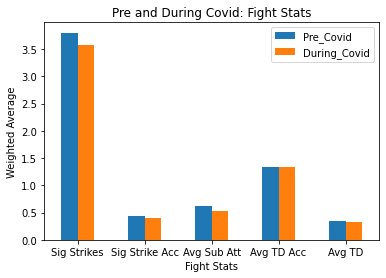

In [50]:
df = pd.DataFrame({'Pre_Covid': pre_covid_bar,'During_Covid': during_covid_bar}, index=x_labels)
ax = df.plot.bar(rot=0)

# Add labels to X and Y axes :: Add title
plt.title("Pre and During Covid: Fight Stats")
plt.xlabel("Fight Stats")
plt.ylabel("Weighted Average")
output_file = "Images/Pre_and_during_covid_fight_stats_bar.png"
plt.savefig(output_file)
plt.show()


## Working with UFC Results Data

In [51]:
# Import data
ufc_result_data = pd.read_csv("data_files/UFC2020FightResultsREADJUSTED.csv")
ufc_result_data

,Unnamed: 0,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME,Unnamed: 11,SUM Pre COVID,Unnamed: 13,SUM During COVID,Unnamed: 15
0,Pre_COVID,WIN,Jairzinho Rozenstruik,1,89,0,0,Heavyweight,KO/TKO,5,4:56,NaN,U-DEC,86.0,U-DEC,89.0
1,Pre_COVID,NaN,Alistair Overeem,0,74,2,0,NaN,Punch,NaN,NaN,NaN,S-DEC,24.0,S-DEC,16.0
2,Pre_COVID,DRAW,Marina Rodriguez,0,56,0,0,Women's Strawweight,M-DEC,3,5:00,NaN,M-DEC,3.0,M-DEC,2.0
3,Pre_COVID,DRAW,Cynthia Calvillo,0,78,3,0,NaN,NaN,NaN,NaN,NaN,TKO,69.0,TKO,67.0
4,Pre_COVID,WIN,Ben Rothwell,1,58,0,0,Heavyweight,KO/TKO,2,4:57,NaN,SUB,35.0,SUB,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,During_COVID,NaN,Geraldo de Freitas,0,76,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,During_COVID,WIN,Alex Morono,0,176,3,0,Welterweight,U-DEC,3,5:00,NaN,NaN,NaN,NaN,NaN
882,During_COVID,NaN,Rhys McKee,0,124,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,During_COVID,WIN,Don'Tale Mayes,0,59,1,0,Heavyweight,U-DEC,3,5:00,NaN,NaN,NaN,NaN,NaN


In [52]:
# Rename column
renamed_result = ufc_result_data.rename(columns={"Unnamed: 0":"Pre/During COVID"})
renamed_result

,Pre/During COVID,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME,Unnamed: 11,SUM Pre COVID,Unnamed: 13,SUM During COVID,Unnamed: 15
0,Pre_COVID,WIN,Jairzinho Rozenstruik,1,89,0,0,Heavyweight,KO/TKO,5,4:56,NaN,U-DEC,86.0,U-DEC,89.0
1,Pre_COVID,NaN,Alistair Overeem,0,74,2,0,NaN,Punch,NaN,NaN,NaN,S-DEC,24.0,S-DEC,16.0
2,Pre_COVID,DRAW,Marina Rodriguez,0,56,0,0,Women's Strawweight,M-DEC,3,5:00,NaN,M-DEC,3.0,M-DEC,2.0
3,Pre_COVID,DRAW,Cynthia Calvillo,0,78,3,0,NaN,NaN,NaN,NaN,NaN,TKO,69.0,TKO,67.0
4,Pre_COVID,WIN,Ben Rothwell,1,58,0,0,Heavyweight,KO/TKO,2,4:57,NaN,SUB,35.0,SUB,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,During_COVID,NaN,Geraldo de Freitas,0,76,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,During_COVID,WIN,Alex Morono,0,176,3,0,Welterweight,U-DEC,3,5:00,NaN,NaN,NaN,NaN,NaN
882,During_COVID,NaN,Rhys McKee,0,124,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,During_COVID,WIN,Don'Tale Mayes,0,59,1,0,Heavyweight,U-DEC,3,5:00,NaN,NaN,NaN,NaN,NaN


In [53]:
# Get the pre_covid data
pre_covid_groupby = renamed_result.loc[renamed_result["Pre/During COVID"]=="Pre_COVID"]
pre_covid_groupby

,Pre/During COVID,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME,Unnamed: 11,SUM Pre COVID,Unnamed: 13,SUM During COVID,Unnamed: 15
0,Pre_COVID,WIN,Jairzinho Rozenstruik,1,89,0,0,Heavyweight,KO/TKO,5,4:56,NaN,U-DEC,86.0,U-DEC,89.0
1,Pre_COVID,NaN,Alistair Overeem,0,74,2,0,NaN,Punch,NaN,NaN,NaN,S-DEC,24.0,S-DEC,16.0
2,Pre_COVID,DRAW,Marina Rodriguez,0,56,0,0,Women's Strawweight,M-DEC,3,5:00,NaN,M-DEC,3.0,M-DEC,2.0
3,Pre_COVID,DRAW,Cynthia Calvillo,0,78,3,0,NaN,NaN,NaN,NaN,NaN,TKO,69.0,TKO,67.0
4,Pre_COVID,WIN,Ben Rothwell,1,58,0,0,Heavyweight,KO/TKO,2,4:57,NaN,SUB,35.0,SUB,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Pre_COVID,NaN,Philipe Lins,0,6,0,0,NaN,Punches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,Pre_COVID,WIN,Kay Hansen,0,31,2,1,Women's Strawweight,SUB,3,2:26,NaN,NaN,NaN,NaN,NaN
437,Pre_COVID,NaN,Jinh Yu Frey,0,26,0,0,NaN,Armbar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,Pre_COVID,WIN,Youssef Zalal,0,59,0,0,Featherweight,U-DEC,3,5:00,NaN,NaN,NaN,NaN,NaN


##### Change in Methods?

In [54]:
# Get the count of method for pre_covid
groupby_method = pre_covid_groupby.groupby("METHOD")["Pre/During COVID"].count()
groupby_method

METHOD
Ankle Lock           1
Arm Triangle         4
Armbar               4
D'Arce Choke         1
DQ                   2
Elbow                2
Elbows               2
Flying Knee          1
Guillotine Choke     7
KO/TKO              69
Kick                 3
Kimura               1
Knee                 3
Kneebar              1
Knees                1
M-DEC                3
Other - Lock         1
Overturned           1
Punch               30
Punches             27
Rear Naked Choke    14
S-DEC               24
SUB                 35
Triangle Choke       1
U-DEC               86
Name: Pre/During COVID, dtype: int64

In [55]:
# Create an x axis list
# Create a pre_covid list for method
x_axis = ["KO/TKO","U-DEC","S-DEC","SUB" ]
pre_covid = [49,62,19,25]

In [56]:
# Combine U-DEC and S-DEC
pre_decision = groupby_method["S-DEC"] + groupby_method["U-DEC"]


In [57]:
pre_covid_list = [groupby_method["KO/TKO"],groupby_method["SUB"],pre_decision]
pre_covid_list
# for i in pre_covid_list: print(type(i))
    

[69, 35, 110]

In [58]:
# Get the sum
np.sum(pre_covid)
pre_covid_total = np.sum(pre_covid)
type(pre_covid_total)

numpy.int64

In [59]:
#Percentage of Method Pre-Covid
percentage_pre_covid = [x/pre_covid_total*100 for x in pre_covid_list]
percentage_pre_covid

[44.516129032258064, 22.58064516129032, 70.96774193548387]

In [60]:
#Percentage of each method
groupby_method_df = pd.DataFrame(groupby_method)
groupby_method_df

,Pre/During COVID
METHOD,
Ankle Lock,1
Arm Triangle,4
Armbar,4
D'Arce Choke,1
DQ,2
Elbow,2
Elbows,2
Flying Knee,1
Guillotine Choke,7


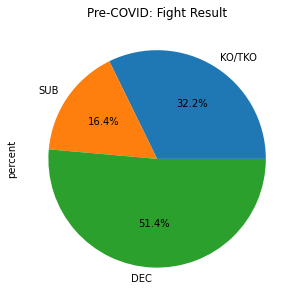

In [61]:
# df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
#                   index=['Mercury', 'Venus', 'Earth'])
# plot = df.plot.pie(y='mass', figsize=(5, 5))

df = pd.DataFrame({'percent': percentage_pre_covid}, index=['KO/TKO', 'SUB', 'DEC'])
plot = df.plot.pie(y='percent', figsize=(5, 5), autopct="%1.1f%%", legend=None)
plt.title("Pre-COVID: Fight Result")
output_file = "Images/Pre_Covid_Fight_Result_pie.png"
plt.savefig(output_file)
plt.show()



groupby_method["KO/TKO"]/np.sum(pre_covid)

In [62]:
# Get the during_covid data
during_covid_groupby = renamed_result.loc[renamed_result["Pre/During COVID"]=="During_COVID"]
during_covid_groupby

,Pre/During COVID,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME,Unnamed: 11,SUM Pre COVID,Unnamed: 13,SUM During COVID,Unnamed: 15
441,During_COVID,WIN,Kamaru Usman,0,94,5,0,Welterweight,U-DEC,5,5:00,NaN,NaN,NaN,NaN,NaN
442,During_COVID,NaN,Jorge Masvidal,0,66,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,During_COVID,WIN,Alexander Volkanovski,0,137,3,0,Featherweight,S-DEC,5,5:00,NaN,0,NaN,NaN,NaN
444,During_COVID,NaN,Max Holloway,0,102,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,During_COVID,WIN,Petr Yan,1,194,1,0,Bantamweight,KO/TKO,5,3:24,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,During_COVID,NaN,Geraldo de Freitas,0,76,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,During_COVID,WIN,Alex Morono,0,176,3,0,Welterweight,U-DEC,3,5:00,NaN,NaN,NaN,NaN,NaN
882,During_COVID,NaN,Rhys McKee,0,124,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,During_COVID,WIN,Don'Tale Mayes,0,59,1,0,Heavyweight,U-DEC,3,5:00,NaN,NaN,NaN,NaN,NaN


In [63]:
# Get the count of method for during_covid
during_method = during_covid_groupby.groupby("METHOD")["Pre/During COVID"].count()
during_method

METHOD
Anaconda Choke         1
Arm Triangle           2
Armbar                10
D'Arce Choke           1
Elbow                  2
Elbows                 4
Forearm Choke          1
Guillotine Choke      10
Heel Hook              1
Injury                 1
KO/TKO                67
Kick                   8
Kimura                 1
Knee                   4
Kneebar                1
M-DEC                  2
Neck Crank             1
Overturned             2
Punch                 20
Punches               24
Rear Naked Choke      14
S-DEC                 16
SUB                   46
Spinning Back Fist     1
Spinning Back Kick     1
Triangle Choke         3
U-DEC                 89
Name: Pre/During COVID, dtype: int64

In [64]:
# Create a during_covid list for method
during_covid = [67,89,16,46]

In [65]:
# Combine U-DEC and S-DEC
dur_decision = during_method["S-DEC"] + during_method["U-DEC"]
dur_decision

105

In [66]:
dur_covid_list = [during_method["KO/TKO"],during_method["SUB"],dur_decision]
dur_covid_list
# for i in dur_covid_list: print(type(i))

[67, 46, 105]

In [67]:
# Get the sum
np.sum(during_covid)
during_covid_total = np.sum(during_covid)
type(during_covid_total)


numpy.int64

In [68]:
#Percentage of Method During-Covid
percentage_during_covid = [x/during_covid_total*100 for x in dur_covid_list]
percentage_during_covid

[30.73394495412844, 21.100917431192663, 48.1651376146789]

In [69]:
#Percentage of each method
dur_groupby_method_df = pd.DataFrame(groupby_method)
dur_groupby_method_df

,Pre/During COVID
METHOD,
Ankle Lock,1
Arm Triangle,4
Armbar,4
D'Arce Choke,1
DQ,2
Elbow,2
Elbows,2
Flying Knee,1
Guillotine Choke,7


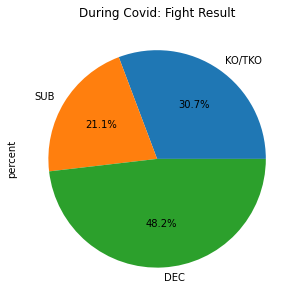

In [70]:
# df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
#                   index=['Mercury', 'Venus', 'Earth'])
# plot = df.plot.pie(y='mass', figsize=(5, 5))

df = pd.DataFrame({'percent': percentage_during_covid}, index=['KO/TKO', 'SUB', 'DEC'])
plot = df.plot.pie(y='percent', figsize=(5, 5), autopct="%1.1f%%", legend=None)
plt.title("During Covid: Fight Result")
output_file = "Images/During_Covid_Fight_Result_pie.png"
plt.savefig(output_file)
plt.show()

##### Diving Deeper: Weight Class

In [71]:
# Check to see what weight classes are there
renamed_result["WEIGHT CLASS"].unique()

array(['Heavyweight', nan, "Women's Strawweight", "Women's Bantamweight",
       'Bantamweight', 'Welterweight', 'Featherweight', 'Lightweight',
       'Middleweight', 'Flyweight', "Women's Flyweight",
       'Light Heavyweight', "Women's Featherweight", 'Catch Weight',
       'WEIGHT CLASS'], dtype=object)

In [72]:
# Get the counts of method KO/TKO for weight classes for pre_covid
weight_classes = ['Flyweight','Bantamweight','Featherweight','Lightweight','Welterweight','Middleweight',
                  'Light Heavyweight', 'Heavyweight',"Women's Strawweight","Women's Flyweight",
                  "Women's Bantamweight","Women's Featherweight"]
ko_tko_classes = []

for classes in weight_classes:

    ko_tko = len(pre_covid_groupby.loc[(pre_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (pre_covid_groupby["METHOD"]== "KO/TKO")])
    
    ko_tko_classes.append(ko_tko)
    
    print(classes, ko_tko)

Flyweight 4
Bantamweight 9
Featherweight 9
Lightweight 7
Welterweight 11
Middleweight 7
Light Heavyweight 5
Heavyweight 9
Women's Strawweight 1
Women's Flyweight 2
Women's Bantamweight 3
Women's Featherweight 2


In [73]:
# Get the counts of method Sub for weight classes for pre_covid

sub_classes = []

for classes in weight_classes:

    sub = len(pre_covid_groupby.loc[(pre_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (pre_covid_groupby["METHOD"]== "SUB")])
    
    sub_classes.append(sub)
    
    print(classes, sub)

Flyweight 2
Bantamweight 4
Featherweight 4
Lightweight 6
Welterweight 2
Middleweight 3
Light Heavyweight 1
Heavyweight 3
Women's Strawweight 4
Women's Flyweight 3
Women's Bantamweight 0
Women's Featherweight 0


In [74]:
# Get the counts of method U-DEC for weight classes for pre_covid

u_dec_classes = []

for classes in weight_classes:

    u_dec = len(pre_covid_groupby.loc[(pre_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (pre_covid_groupby["METHOD"]== "U-DEC")])
    
    u_dec_classes.append(u_dec)
    
    print(classes, u_dec)

Flyweight 6
Bantamweight 6
Featherweight 13
Lightweight 10
Welterweight 11
Middleweight 6
Light Heavyweight 6
Heavyweight 6
Women's Strawweight 4
Women's Flyweight 8
Women's Bantamweight 7
Women's Featherweight 1


In [75]:
# Get the counts of method S-DEC for weight classes for pre_covid

s_dec_classes = []

for classes in weight_classes:

    s_dec = len(pre_covid_groupby.loc[(pre_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (pre_covid_groupby["METHOD"]== "S-DEC")])
    
    s_dec_classes.append(s_dec)
    
    print(classes, s_dec)

Flyweight 0
Bantamweight 5
Featherweight 4
Lightweight 3
Welterweight 1
Middleweight 1
Light Heavyweight 2
Heavyweight 3
Women's Strawweight 3
Women's Flyweight 2
Women's Bantamweight 0
Women's Featherweight 0


In [76]:
u_dec_classes

[6, 6, 13, 10, 11, 6, 6, 6, 4, 8, 7, 1]

In [77]:
s_dec_classes

[0, 5, 4, 3, 1, 1, 2, 3, 3, 2, 0, 0]

In [78]:
# Adding u-dec and s-dec together
pre_decision = [x + y for x, y in zip(u_dec_classes, s_dec_classes)]
pre_decision

[6, 11, 17, 13, 12, 7, 8, 9, 7, 10, 7, 1]

In [79]:
# Get the counts of method KO/TKO for weight classes for during_covid

covid_ko_tko_classes = []

for classes in weight_classes:

    ko_tko = len(during_covid_groupby.loc[(during_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (during_covid_groupby["METHOD"]== "KO/TKO")])
    
    covid_ko_tko_classes.append(ko_tko)
        
    print(classes, ko_tko)

Flyweight 0
Bantamweight 11
Featherweight 5
Lightweight 5
Welterweight 6
Middleweight 12
Light Heavyweight 12
Heavyweight 11
Women's Strawweight 0
Women's Flyweight 3
Women's Bantamweight 1
Women's Featherweight 0


In [80]:
# Get the counts of method Sub for weight classes for during_covid

covid_sub_classes = []

for classes in weight_classes:

    sub = len(during_covid_groupby.loc[(during_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (during_covid_groupby["METHOD"]== "SUB")])
    
    covid_sub_classes.append(sub)
    
    print(classes, sub)

Flyweight 2
Bantamweight 3
Featherweight 7
Lightweight 5
Welterweight 4
Middleweight 5
Light Heavyweight 3
Heavyweight 4
Women's Strawweight 4
Women's Flyweight 7
Women's Bantamweight 1
Women's Featherweight 0


In [81]:
# Get the counts of method U-DEC for weight classes for during_covid

covid_u_dec_classes = []

for classes in weight_classes:

    u_dec = len(during_covid_groupby.loc[(during_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (during_covid_groupby["METHOD"]== "U-DEC")])
    
    covid_u_dec_classes.append(u_dec)
    
    print(classes, u_dec)

Flyweight 5
Bantamweight 8
Featherweight 16
Lightweight 10
Welterweight 12
Middleweight 8
Light Heavyweight 3
Heavyweight 6
Women's Strawweight 7
Women's Flyweight 5
Women's Bantamweight 7
Women's Featherweight 0


In [82]:
# Get the counts of method S-DEC for weight classes for during_covid

covid_s_dec_classes = []

for classes in weight_classes:

    s_dec = len(during_covid_groupby.loc[(during_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (during_covid_groupby["METHOD"]== "S-DEC")])
    
    covid_s_dec_classes.append(s_dec)
    
    print(classes, s_dec)

Flyweight 0
Bantamweight 4
Featherweight 3
Lightweight 2
Welterweight 1
Middleweight 1
Light Heavyweight 2
Heavyweight 0
Women's Strawweight 3
Women's Flyweight 0
Women's Bantamweight 0
Women's Featherweight 0


In [83]:
# Adding u-dec and s-dec together
during_decision = [x + y for x, y in zip(covid_u_dec_classes, covid_s_dec_classes)]
during_decision

[5, 12, 19, 12, 13, 9, 5, 6, 10, 5, 7, 0]

#### Combine Stats into DataFrame

In [84]:
# Create a dataframe for these values
weight_classes_data = pd.DataFrame({"Weight Classes":weight_classes,
                                   "Pre-COVID KO":ko_tko_classes,
                                   "Dur-COVID KO":covid_ko_tko_classes, 
                                   "Pre-COVID SUB":sub_classes,
                                    "Dur-COVID SUB":covid_sub_classes,
                                   "Pre-COVID DEC":pre_decision,
                                   "Dur-COVID DEC":during_decision})
weight_classes_data

,Weight Classes,Pre-COVID KO,Dur-COVID KO,Pre-COVID SUB,Dur-COVID SUB,Pre-COVID DEC,Dur-COVID DEC
0,Flyweight,4,0,2,2,6,5
1,Bantamweight,9,11,4,3,11,12
2,Featherweight,9,5,4,7,17,19
3,Lightweight,7,5,6,5,13,12
4,Welterweight,11,6,2,4,12,13
5,Middleweight,7,12,3,5,7,9
6,Light Heavyweight,5,12,1,3,8,5
7,Heavyweight,9,11,3,4,9,6
8,Women's Strawweight,1,0,4,4,7,10
9,Women's Flyweight,2,3,3,7,10,5


### Percentages

In [85]:
weight_classes_data.columns

Index(['Weight Classes', 'Pre-COVID KO', 'Dur-COVID KO', 'Pre-COVID SUB',
       'Dur-COVID SUB', 'Pre-COVID DEC', 'Dur-COVID DEC'],
      dtype='object')

In [86]:
#pre_covid_list = [groupby_method["KO/TKO"],groupby_method["SUB"],pre_decision]
pre_covid_list

[69, 35, 110]

In [87]:
#dur_covid_list = [during_method["KO/TKO"],during_method["SUB"],dur_decision]
dur_covid_list

[67, 46, 105]

In [88]:
# Get the percentage for ko/tko pre-covid
pre_ko_percentage = ((weight_classes_data['Pre-COVID KO'])/groupby_method["KO/TKO"])*100
pre_ko_percentage

0      5.797101
1     13.043478
2     13.043478
3     10.144928
4     15.942029
5     10.144928
6      7.246377
7     13.043478
8      1.449275
9      2.898551
10     4.347826
11     2.898551
Name: Pre-COVID KO, dtype: float64

In [89]:
# Get the percentage for sub pre-covid
pre_sub_percentage = ((weight_classes_data['Pre-COVID SUB'])/groupby_method["SUB"])*100
pre_sub_percentage

0      5.714286
1     11.428571
2     11.428571
3     17.142857
4      5.714286
5      8.571429
6      2.857143
7      8.571429
8     11.428571
9      8.571429
10     0.000000
11     0.000000
Name: Pre-COVID SUB, dtype: float64

In [90]:
# Get the percentage for dec pre-covid
# For the combined number of DEC, has to use the number itself
pre_dec_percentage = ((weight_classes_data['Pre-COVID DEC'])/110)*100
pre_dec_percentage

0      5.454545
1     10.000000
2     15.454545
3     11.818182
4     10.909091
5      6.363636
6      7.272727
7      8.181818
8      6.363636
9      9.090909
10     6.363636
11     0.909091
Name: Pre-COVID DEC, dtype: float64

In [91]:
# Get the percentage for ko/tko dur-covid
dur_ko_percentage = ((weight_classes_data['Dur-COVID KO'])/during_method["KO/TKO"])*100
dur_ko_percentage

0      0.000000
1     16.417910
2      7.462687
3      7.462687
4      8.955224
5     17.910448
6     17.910448
7     16.417910
8      0.000000
9      4.477612
10     1.492537
11     0.000000
Name: Dur-COVID KO, dtype: float64

In [92]:
# Get the percentage for sub dur-covid
dur_sub_percentage = ((weight_classes_data['Dur-COVID SUB'])/during_method["SUB"])*100
dur_sub_percentage

0      4.347826
1      6.521739
2     15.217391
3     10.869565
4      8.695652
5     10.869565
6      6.521739
7      8.695652
8      8.695652
9     15.217391
10     2.173913
11     0.000000
Name: Dur-COVID SUB, dtype: float64

In [93]:
# Get the percentage for dec pre-covid
# For the combined number of DEC, has to use the number itself
dur_dec_percentage = ((weight_classes_data['Dur-COVID DEC'])/105)*100
dur_dec_percentage

0      4.761905
1     11.428571
2     18.095238
3     11.428571
4     12.380952
5      8.571429
6      4.761905
7      5.714286
8      9.523810
9      4.761905
10     6.666667
11     0.000000
Name: Dur-COVID DEC, dtype: float64

#### Percentage DataFrame for Weight Classes

In [94]:
# Create a dataframe for these values
percentage_weight_class = pd.DataFrame({"Weight Classes":weight_classes,
                                   "Pre-COVID KO %":pre_ko_percentage,
                                   "Dur-COVID KO %":dur_ko_percentage, 
                                   "Pre-COVID SUB %":pre_sub_percentage,
                                    "Dur-COVID SUB %":dur_sub_percentage,
                                   "Pre-COVID DEC %":pre_dec_percentage,
                                   "Dur-COVID DEC %":dur_dec_percentage})
percentage_weight_class

,Weight Classes,Pre-COVID KO %,Dur-COVID KO %,Pre-COVID SUB %,Dur-COVID SUB %,Pre-COVID DEC %,Dur-COVID DEC %
0,Flyweight,5.797101,0.000000,5.714286,4.347826,5.454545,4.761905
1,Bantamweight,13.043478,16.417910,11.428571,6.521739,10.000000,11.428571
2,Featherweight,13.043478,7.462687,11.428571,15.217391,15.454545,18.095238
3,Lightweight,10.144928,7.462687,17.142857,10.869565,11.818182,11.428571
4,Welterweight,15.942029,8.955224,5.714286,8.695652,10.909091,12.380952
5,Middleweight,10.144928,17.910448,8.571429,10.869565,6.363636,8.571429
6,Light Heavyweight,7.246377,17.910448,2.857143,6.521739,7.272727,4.761905
7,Heavyweight,13.043478,16.417910,8.571429,8.695652,8.181818,5.714286
8,Women's Strawweight,1.449275,0.000000,11.428571,8.695652,6.363636,9.523810
9,Women's Flyweight,2.898551,4.477612,8.571429,15.217391,9.090909,4.761905


In [95]:
x_axis = ["Pre-COVID KO", "Dur-COVID KO", "Pre-COVID SUB","Dur-COVID SUB","Pre-COVID DEC","Dur-COVID DEC"]
# TODO: change hard coded values to dynamic values 
# Create a for loop to extract all numberical numbers for each weight classes
weight_classes_row = list(range(12))

weight_classes_fight_graph = []

for row in weight_classes_row:
    row_list = [percentage_weight_class.iloc[row]["Pre-COVID KO %"], 
                           percentage_weight_class.iloc[row]["Dur-COVID KO %"], 
                           percentage_weight_class.iloc[row]["Pre-COVID SUB %"],
                          percentage_weight_class.iloc[row]["Dur-COVID SUB %"],
                           percentage_weight_class.iloc[row]["Pre-COVID DEC %"],
                          percentage_weight_class.iloc[row]["Dur-COVID DEC %"]]
    weight_classes_fight_graph.append(row_list)

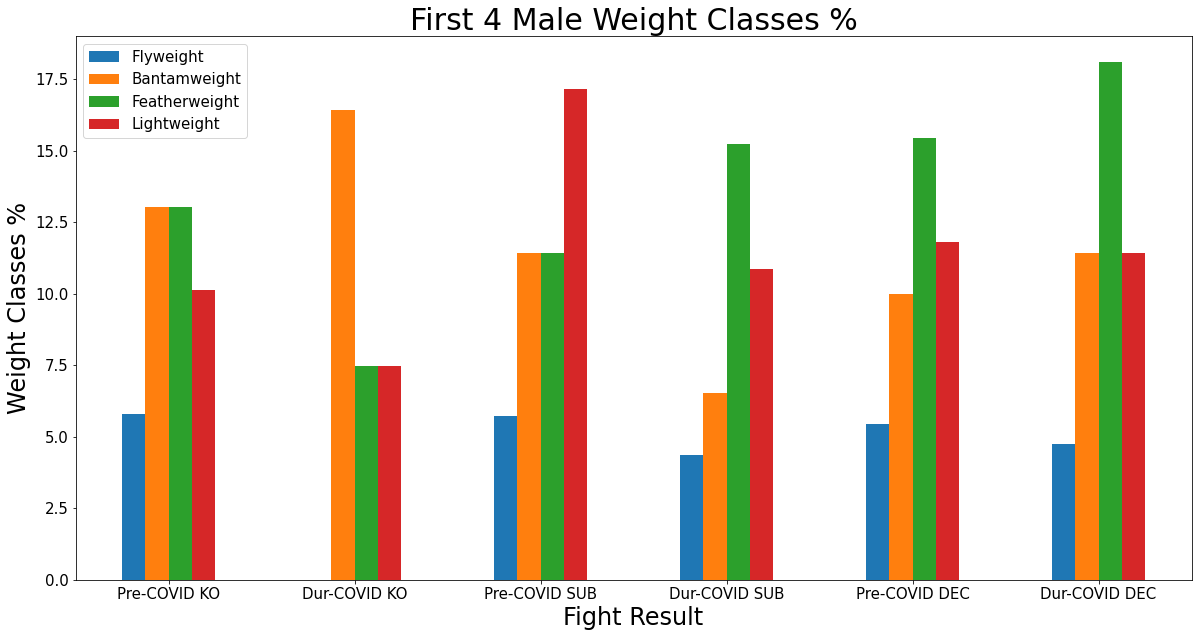

In [96]:
# Light weight class
df = pd.DataFrame({'Flyweight': weight_classes_fight_graph[0],
                   'Bantamweight': weight_classes_fight_graph[1],
                  'Featherweight': weight_classes_fight_graph[2],
                  'Lightweight': weight_classes_fight_graph[3]}, 
                  index=x_axis)
ax = df.plot.bar(figsize=(20,10),rot=0)
# Add labels to X and Y axes :: Add title
plt.title("First 4 Male Weight Classes %", fontsize=30)
plt.xlabel("Fight Result", fontsize =24)
plt.ylabel("Weight Classes %", fontsize =24)
ax.set_xticklabels(x_axis, fontsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(prop={"size":15})
output_file = "Images/first_4_weight_classes%.png"
plt.savefig(output_file)
plt.show()

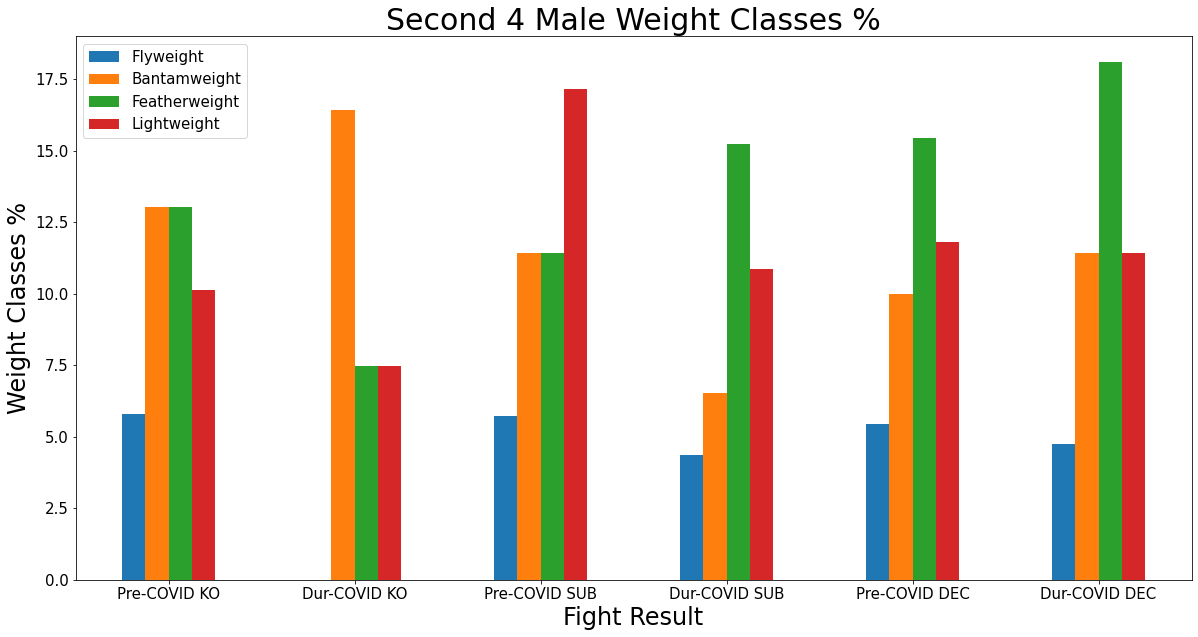

In [97]:
second_df = pd.DataFrame({
                   'Welterweight': weight_classes_fight_graph[4],
                  'Middleweight': weight_classes_fight_graph[5],
                  'Light Heavyweight': weight_classes_fight_graph[6],
                   'Heavyweight': weight_classes_fight_graph[7]}, 
                  index=x_axis)
second_ax = df.plot.bar(figsize=(20,10),rot=0)
# Add labels to X and Y axes :: Add title
plt.title("Second 4 Male Weight Classes %", fontsize=30)
plt.xlabel("Fight Result", fontsize =24)
plt.ylabel("Weight Classes %", fontsize =24)
second_ax.set_xticklabels(x_axis, fontsize=15)
second_ax.tick_params(axis="y", labelsize=15)
plt.legend(prop={"size":15})
output_file = "Images/second_4_weight_classes%.png"
plt.savefig(output_file)
plt.show()

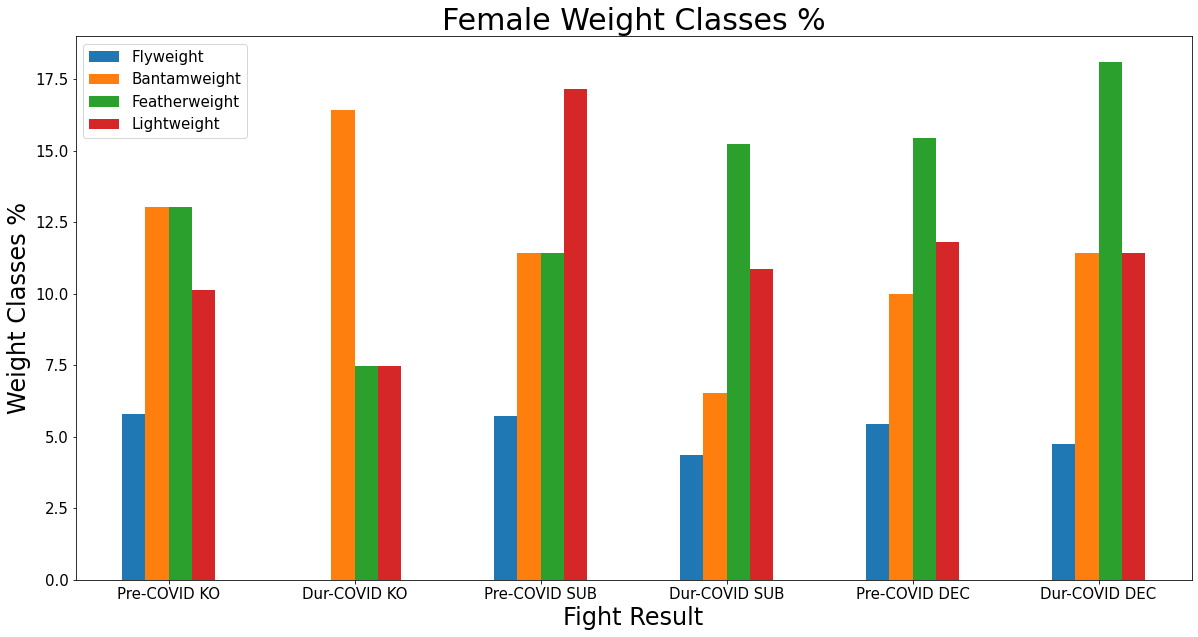

In [98]:
third_df = pd.DataFrame({
                  "Women's Strawweight": weight_classes_fight_graph[8],
                  "Women's Flyweight": weight_classes_fight_graph[9],
                   "Women's Bantamweight": weight_classes_fight_graph[10],
                  "Women's Featherweight": weight_classes_fight_graph[11]}, 
                  index=x_axis)
third_ax = df.plot.bar(figsize=(20,10),rot=0)
# Add labels to X and Y axes :: Add title
plt.title("Female Weight Classes %", fontsize=30)
plt.xlabel("Fight Result", fontsize =24)
plt.ylabel("Weight Classes %", fontsize =24)
third_ax.set_xticklabels(x_axis, fontsize=15)
third_ax.tick_params(axis="y", labelsize=15)
plt.legend(prop={"size":15})
output_file = "Images/women_group_weight_classes%.png"
plt.savefig(output_file)
plt.show()

Percentage DataFrame for Weight Classes by Group

In [99]:
weight_classes_data

,Weight Classes,Pre-COVID KO,Dur-COVID KO,Pre-COVID SUB,Dur-COVID SUB,Pre-COVID DEC,Dur-COVID DEC
0,Flyweight,4,0,2,2,6,5
1,Bantamweight,9,11,4,3,11,12
2,Featherweight,9,5,4,7,17,19
3,Lightweight,7,5,6,5,13,12
4,Welterweight,11,6,2,4,12,13
5,Middleweight,7,12,3,5,7,9
6,Light Heavyweight,5,12,1,3,8,5
7,Heavyweight,9,11,3,4,9,6
8,Women's Strawweight,1,0,4,4,7,10
9,Women's Flyweight,2,3,3,7,10,5


In [100]:
# Count of the weight class
total_numbers = weight_classes_data.sum(axis=1) 
total_numbers 

0     19
1     50
2     61
3     48
4     48
5     43
6     34
7     42
8     26
9     30
10    19
11     3
dtype: int64

In [101]:
# Total number of Flyweight
total_numbers[0] 

19

In [102]:
# Flyweight individual counts
flyweight_list = weight_classes_data.iloc[0]
flyweight_list

Weight Classes    Flyweight
Pre-COVID KO              4
Dur-COVID KO              0
Pre-COVID SUB             2
Dur-COVID SUB             2
Pre-COVID DEC             6
Dur-COVID DEC             5
Name: 0, dtype: object

In [103]:
# Flyweight percentage
flyweight = list(list(((flyweight_list[1:7])/total_numbers[0])*100))
flyweight

[21.052631578947366,
 0.0,
 10.526315789473683,
 10.526315789473683,
 31.57894736842105,
 26.31578947368421]

In [104]:
# Total number of Bantamweight
total_numbers[1] 

50

In [105]:
# Bantamweight individual counts
bantamweight_list = weight_classes_data.iloc[1]
bantamweight_list

Weight Classes    Bantamweight
Pre-COVID KO                 9
Dur-COVID KO                11
Pre-COVID SUB                4
Dur-COVID SUB                3
Pre-COVID DEC               11
Dur-COVID DEC               12
Name: 1, dtype: object

In [106]:
# Bantamweight percentage
bantamweight = list(list(((bantamweight_list[1:7])/total_numbers[1])*100))
bantamweight

[18.0, 22.0, 8.0, 6.0, 22.0, 24.0]

In [107]:
# Total number of Featherweight
total_numbers[2] 

61

In [108]:
# Featherweight individual counts
featherweight_list = weight_classes_data.iloc[2]
featherweight_list

Weight Classes    Featherweight
Pre-COVID KO                  9
Dur-COVID KO                  5
Pre-COVID SUB                 4
Dur-COVID SUB                 7
Pre-COVID DEC                17
Dur-COVID DEC                19
Name: 2, dtype: object

In [109]:
# Featherweight percentage
featherweight = list(list(((featherweight_list[1:7])/total_numbers[2])*100))
featherweight

[14.754098360655737,
 8.19672131147541,
 6.557377049180328,
 11.475409836065573,
 27.86885245901639,
 31.147540983606557]

In [110]:
# Total number of Lightweight
total_numbers[3] 

48

In [111]:
# Lightweight individual counts
lightweight_list = weight_classes_data.iloc[3]
lightweight_list

Weight Classes    Lightweight
Pre-COVID KO                7
Dur-COVID KO                5
Pre-COVID SUB               6
Dur-COVID SUB               5
Pre-COVID DEC              13
Dur-COVID DEC              12
Name: 3, dtype: object

In [112]:
# Lightweight percentage
lightweight = list(list(((lightweight_list[1:7])/total_numbers[3])*100))
lightweight

[14.583333333333334,
 10.416666666666668,
 12.5,
 10.416666666666668,
 27.083333333333332,
 25.0]

In [113]:
# Total number of Welterweight
total_numbers[4] 
# Welterweight individual counts
welterweight_list = weight_classes_data.iloc[4]
# Welterweight  percentage
welterweight = list(list(((welterweight_list[1:7])/total_numbers[4])*100))
welterweight

[22.916666666666664,
 12.5,
 4.166666666666666,
 8.333333333333332,
 25.0,
 27.083333333333332]

In [114]:
# Total number of Middleweight
total_numbers[5] 
# Middleweight individual counts
middleweight_list = weight_classes_data.iloc[5]
# Middleweight  percentage
middleweight = list(list(((middleweight_list[1:7])/total_numbers[5])*100))
middleweight

[16.27906976744186,
 27.906976744186046,
 6.976744186046512,
 11.627906976744185,
 16.27906976744186,
 20.930232558139537]

In [115]:
# Total number of Light Heavyweight
total_numbers[6] 
# Light Heavyweight individual counts
light_heavyweight_list = weight_classes_data.iloc[6]
# Light Heavyweight percentage
light_heavyweight = list(list(((light_heavyweight_list[1:7])/total_numbers[6])*100))
light_heavyweight

[14.705882352941178,
 35.294117647058826,
 2.941176470588235,
 8.823529411764707,
 23.52941176470588,
 14.705882352941178]

In [116]:
# Total number of Heavyweight
total_numbers[7] 
# Heavyweight individual counts
heavyweight_list = weight_classes_data.iloc[7]
# Heavyweight percentage
heavyweight = list(list(((heavyweight_list[1:7])/total_numbers[7])*100))
heavyweight

[21.428571428571427,
 26.190476190476193,
 7.142857142857142,
 9.523809523809524,
 21.428571428571427,
 14.285714285714285]

In [117]:
# Total number of Women's Strawweight
total_numbers[8] 
# Women's Strawweight individual counts
women_strawweight_list = weight_classes_data.iloc[8]
# Women's Strawweight percentage
women_strawweight = list(list(((women_strawweight_list[1:7])/total_numbers[8])*100))
women_strawweight

[3.8461538461538463,
 0.0,
 15.384615384615385,
 15.384615384615385,
 26.923076923076923,
 38.46153846153847]

In [118]:
# Total number of Women's Flyweight
total_numbers[9] 
# Women's Flyweight individual counts
women_flyweight_list = weight_classes_data.iloc[9]
# Women's Flyweight percentage
women_flyweight = list(list(((women_flyweight_list[1:7])/total_numbers[9])*100))
women_flyweight

[6.666666666666667,
 10.0,
 10.0,
 23.333333333333332,
 33.33333333333333,
 16.666666666666664]

In [119]:
# Total number of Women's Bantamweight
total_numbers[10] 
# Women's Bantamweight individual counts
women_bantamweight_list = weight_classes_data.iloc[10]
# Women's Bantamweight percentage
women_bantamweight = list(((list(women_bantamweight_list[1:7])/total_numbers[10])*100))
women_bantamweight

[15.789473684210526,
 5.263157894736842,
 0.0,
 5.263157894736842,
 36.84210526315789,
 36.84210526315789]

In [120]:
# Total number of Women's Featherweight
total_numbers[11] 
# Women's Featherweight individual counts
women_featherweight_list = weight_classes_data.iloc[11]
# Women's Featherweight percentage
women_featherweight = list(list(((women_featherweight_list[1:7])/total_numbers[11])*100))
women_featherweight

[66.66666666666666, 0.0, 0.0, 0.0, 33.33333333333333, 0.0]

In [121]:
# Put these data into a dataframe
row_names = ["Pre-COVID KO", "Dur-COVID KO", "Pre-COVID SUB", "Dur-COVID SUB", "Pre-COVID DEC", "Dur-COVID DEC"]

weight_classes_group = pd.DataFrame({"Description":row_names,
                                     "Flyweight":flyweight,
                                     "Bantamweight":bantamweight,
                                     "Featherweight":featherweight,
                                     "Lightweight":lightweight,
                                     "Welterweight":welterweight,
                                     "Middleweight":middleweight,
                                     "Light Heavyweight":light_heavyweight,
                                     "Heavyweight":heavyweight,
                                     "Women's Strawweight":women_strawweight,
                                     "Women's Flyweight":women_flyweight,
                                     "Women's Bantamweight":women_bantamweight,
                                     "Women's Featherweight":women_featherweight
                                    })

weight_classes_group

,Description,Flyweight,Bantamweight,Featherweight,Lightweight,Welterweight,Middleweight,Light Heavyweight,Heavyweight,Women's Strawweight,Women's Flyweight,Women's Bantamweight,Women's Featherweight
0,Pre-COVID KO,21.052632,18.0,14.754098,14.583333,22.916667,16.279070,14.705882,21.428571,3.846154,6.666667,15.789474,66.666667
1,Dur-COVID KO,0.000000,22.0,8.196721,10.416667,12.500000,27.906977,35.294118,26.190476,0.000000,10.000000,5.263158,0.000000
2,Pre-COVID SUB,10.526316,8.0,6.557377,12.500000,4.166667,6.976744,2.941176,7.142857,15.384615,10.000000,0.000000,0.000000
3,Dur-COVID SUB,10.526316,6.0,11.475410,10.416667,8.333333,11.627907,8.823529,9.523810,15.384615,23.333333,5.263158,0.000000
4,Pre-COVID DEC,31.578947,22.0,27.868852,27.083333,25.000000,16.279070,23.529412,21.428571,26.923077,33.333333,36.842105,33.333333
5,Dur-COVID DEC,26.315789,24.0,31.147541,25.000000,27.083333,20.930233,14.705882,14.285714,38.461538,16.666667,36.842105,0.000000


In [122]:
x_axis_group = ["Flyweight","Bantamweight",'Featherweight','Lightweight',
          'Welterweight', 'Middleweight','Light Heavyweight',
         'Heavyweight',"Women's Strawweight","Women's Flyweight",
         "Women's Bantamweight","Women's Featherweight"]

# Create a for loop to extract all numberical numbers for each weight classes
weight_classes_row = list(range(6))

weight_classes_group_graph = []

for row in weight_classes_row:
    row_list = [weight_classes_group.iloc[row]["Flyweight"], 
                          weight_classes_group.iloc[row]["Bantamweight"], 
                          weight_classes_group.iloc[row]["Featherweight"],
                          weight_classes_group.iloc[row]["Lightweight"],
                          weight_classes_group.iloc[row]["Welterweight"],
                          weight_classes_group.iloc[row]["Middleweight"],
                          weight_classes_group.iloc[row]["Light Heavyweight"],
                          weight_classes_group.iloc[row]["Heavyweight"],
                          weight_classes_group.iloc[row]["Women's Strawweight"],
                          weight_classes_group.iloc[row]["Women's Flyweight"],
                          weight_classes_group.iloc[row]["Women's Bantamweight"],
                          weight_classes_group.iloc[row]["Women's Featherweight"]]
                          
                          
                
    weight_classes_group_graph.append(row_list)

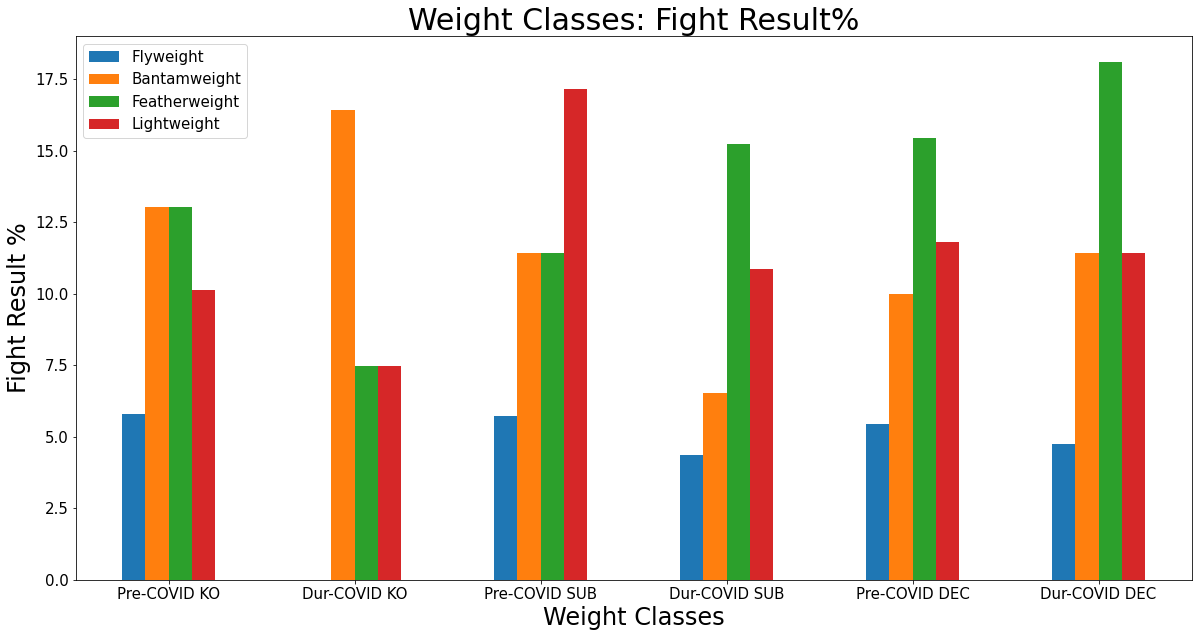

In [123]:
group_df = pd.DataFrame({'Pre-COVID KO': weight_classes_group_graph[0],
                   'Dur-COVID KO': weight_classes_group_graph[1],
                  'Pre-COVID SUB': weight_classes_group_graph[2],
                  'Dur-COVID SUB': weight_classes_group_graph[3],
                   'Dur-COVID DEC': weight_classes_group_graph[4],
                  'Pre-COVID DEC': weight_classes_group_graph[5]}, 
                  index= x_axis_group)
group_ax = df.plot.bar(figsize=(20,10),rot=0)
# Add labels to X and Y axes :: Add title
plt.title("Weight Classes: Fight Result%", fontsize=30)
plt.xlabel("Weight Classes", fontsize =24)
plt.ylabel("Fight Result %", fontsize =24)
group_ax.tick_params(axis="x", labelsize=15)
group_ax.tick_params(axis="y", labelsize=15)
plt.legend(prop={"size":15})
#output_file = "Images/weight_classes_fight_result%.png"
#plt.savefig(output_file)
plt.show()